In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# L_s = np.loadtxt("./Comparison_SW_Sinkhorn_d3").reshape(1,5,20)
L_aiw = np.loadtxt("./Comparison_AIW_d2").reshape(1,7,20)
L_lew = np.loadtxt("./Comparison_LEW_d2").reshape(1,7,20)

# print(np.loadtxt("./Comparison_SW_Sinkhorn_d3").shape)

L_spdsw = np.zeros((1, 2, 7, 20))
for k, proj in enumerate([200]):
    L_spdsw[0, k] = np.loadtxt("./Comparison_SWSPDp_projs_"+str(proj)+"_d2")
#     L_hsw[0, k] = np.loadtxt("./Colab_20trys/Comparison_HSW_projs_"+str(proj))

/share/home/bonet/.conda/envs/pytorch/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/share/home/bonet/.conda/envs/pytorch/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


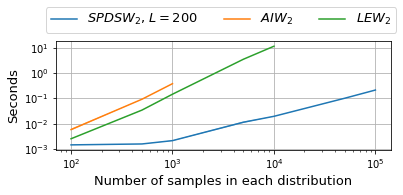

In [3]:
fig = plt.figure(figsize=(6,2))

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": "cm"
# })

ds = [3]
# samples = [int(1e2),int(1e3),int(1e4),int(1e5/2),int(1e5)]
samples = [int(1e2),int(1e3/2),int(1e3),int(1e4/2),int(1e4),int(1e5/2),int(1e5)] #,int(1e6/2)]

for i, d in enumerate(ds):
    for l, n_projs in enumerate([200]):
        m = np.mean(L_spdsw[i, l], axis=-1)
        s = np.std(L_spdsw[i, l], axis=-1)
        
        plt.loglog(samples, m, label=r"$SPDSW_2$," + r" $L=$"+str(n_projs))
        plt.fill_between(samples, m-s, m+s,alpha=0.5)
        

    m_w = np.mean(L_aiw[i], axis=-1)
    s_w = np.std(L_aiw[i], axis=-1)

    plt.loglog(samples, m_w, label=r"$AIW_2$")
    plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)


    m_w = np.mean(L_lew[i], axis=-1)
    s_w = np.std(L_lew[i], axis=-1)

    plt.loglog(samples, m_w, label=r"$LEW_2$")
    plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    

plt.xlabel(r"Number of samples in each distribution", fontsize=13)
plt.ylabel(r"Seconds", fontsize=13)
#     plt.yscale("log")
    # plt.xscale("log")
    
plt.legend(fontsize=13, bbox_to_anchor=(-0.05,1.02,1,0.2), loc="lower left", ncol=3)
# plt.legend(fontsize=13, loc="upper right")
# plt.title("Computational Time", fontsize=13)
plt.grid(True)
plt.yticks([10,1,0.1,0.01,0.001])

plt.savefig("./Comparison_Time_SPDSW.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [4]:
# L_s = np.loadtxt("./Comparison_SW_Sinkhorn_d3").reshape(1,5,20)
L_aiw = np.loadtxt("./Comparison_AIW_d10").reshape(1,7,20)
L_lew = np.loadtxt("./Comparison_LEW_d10").reshape(1,7,20)

# print(np.loadtxt("./Comparison_SW_Sinkhorn_d3").shape)

L_spdsw = np.zeros((1, 2, 7, 20))
for k, proj in enumerate([200]):
    L_spdsw[0, k] = np.loadtxt("./Comparison_SWSPDp_projs_"+str(proj)+"_d10")
#     L_hsw[0, k] = np.loadtxt("./Colab_20trys/Comparison_HSW_projs_"+str(proj))

/share/home/bonet/.conda/envs/pytorch/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/share/home/bonet/.conda/envs/pytorch/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/share/home/bonet/.conda/envs/pytorch/lib/python3.9/site-packages/numpy/core/_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


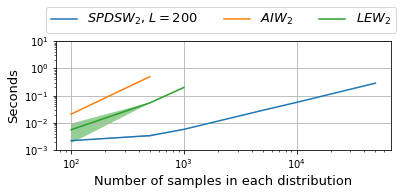

In [6]:
fig = plt.figure(figsize=(6,2))

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": "cm"
# })

ds = [100]
# samples = [int(1e2),int(1e3),int(1e4),int(1e5/2),int(1e5)]
samples = [int(1e2),int(1e3/2),int(1e3),int(1e4/2),int(1e4),int(1e5/2),int(1e5)] #,int(1e6/2)]

for i, d in enumerate(ds):
    for l, n_projs in enumerate([200]):
        m = np.mean(L_spdsw[i, l], axis=-1)
        s = np.std(L_spdsw[i, l], axis=-1)
        
        plt.loglog(samples, m, label=r"$SPDSW_2$," + r" $L=$"+str(n_projs))
        plt.fill_between(samples, m-s, m+s,alpha=0.5)
        

    m_w = np.mean(L_aiw[i], axis=-1)
    s_w = np.std(L_aiw[i], axis=-1)

    plt.loglog(samples, m_w, label=r"$AIW_2$")
    plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)


    m_w = np.mean(L_lew[i], axis=-1)
    s_w = np.std(L_lew[i], axis=-1)

    plt.loglog(samples, m_w, label=r"$LEW_2$")
    plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    

plt.xlabel(r"Number of samples in each distribution", fontsize=13)
plt.ylabel(r"Seconds", fontsize=13)
#     plt.yscale("log")
    # plt.xscale("log")
    
plt.legend(fontsize=13, bbox_to_anchor=(-0.05,1.02,1,0.2), loc="lower left", ncol=3)
# plt.legend(fontsize=13, loc="upper right")
# plt.title("Computational Time", fontsize=13)
plt.grid(True)
plt.yticks([10,1,0.1,0.01,0.001])

plt.savefig("./Comparison_Time_SPDSW_d10.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [4]:
# import matplotlib.font_manager

In [5]:
# fig = plt.figure(figsize=(6,2))

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": "cm"
# })


# ds = [3]
# samples = [int(1e2),int(1e3),int(1e4),int(1e5/2),int(1e5)]

# for i, d in enumerate(ds):
#     for l, n_projs in enumerate([200]):
#         m = np.mean(L_spdsw[i, l], axis=-1)
#         s = np.std(L_spdsw[i, l], axis=-1)
        
#         plt.loglog(samples, m, label=r"$SPDSW_2$," + r" $L=$"+str(n_projs))
#         plt.fill_between(samples, m-s, m+s,alpha=0.5)
        

#     m_w = np.mean(L_aiw[i], axis=-1)
#     s_w = np.std(L_aiw[i], axis=-1)

#     plt.loglog(samples, m_w, label=r"Affine-Invariant Wasserstein")
#     plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)


#     m_w = np.mean(L_lew[i], axis=-1)
#     s_w = np.std(L_lew[i], axis=-1)

#     plt.loglog(samples, m_w, label=r"Log-Euclidean Wasserstein")
#     plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    

# plt.xlabel(r"Number of samples in each distribution", fontsize=13)
# plt.ylabel(r"Seconds", fontsize=13)
# #     plt.yscale("log")
#     # plt.xscale("log")
    
# plt.legend(fontsize=13, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2)
# # plt.title("Computational Time", fontsize=13)
# plt.grid(True)
# plt.yticks([10,1,0.1,0.01,0.001])

# plt.savefig("./Comparison_Time_SPDSW_LateX.pdf", format="pdf", bbox_inches="tight")
# plt.show()